## 决策树

### 引入

1. 微软小冰猜人
2. APP推荐
![JZWafU.png](https://s1.ax1x.com/2020/04/17/JZWafU.png)

### 如何决策拆分点呢？先来了解☝️熵

熵，是一个统计物理与信息论术语，表示的是某一系统“内在的混乱程度”。

我们可以从如下的示例中，直观的感受下熵的大小区别。
![JwImn0.png](https://s1.ax1x.com/2020/04/23/JwImn0.png)

在上图中，可以直观的感受到：
- 左边的箱子中只有红球，那么只有可能有一种结果，所以熵是最低的；
- 其次是中间，最高是最右侧的箱子。

那么具体到数值，应该怎样计算呢？

我们继续以上面三个箱子为例，假设我们随机的从各个箱子里面有放回的取样，如果取出来的结果与箱子中的排列完全一致，那么就判定为成功，否则为失败。那么请问，那个箱子的“成功率“最高呢？

答案显然是左边的箱子，我们利用概率计算验证一下：

- 左边：取红球的概率为1，取四次为独立事件，所以，完全一致的概率为 $1\times 1 \times 1 \times 1 = 1$；
- 中间：取红球的概率为0.75，取蓝球的概率为0.25，所以，完全一致的概率为 $0.75 \times 0.75 \times 0.75 \times 0.25 \approx  0.105$;
- 右边：红球蓝球的概率均为0.5，所以，完全一致的概率为 $0.5 \times 0.5 \times 0.5 \times 0.5 =  0.0625$



上述只是四个样本的情况，如果样本数量非常大，那么各个概率相乘得到结果必定会是一个极小的小数，为了避免这种情况，我们希望可以用和（sum）代替积（products），刚好可以使用log函数实现这个需求。

> 注意⚠️这里使用log计算时，选择的是以2为底的对数计算。

那么，可以计算得到左中右三个箱子的值分别为：0,`np.log2(0.75) * 3 + np.log2(0.25) = -3.245`, -4。

为了让结果能与混乱程度成正比，所以，这里取一个负数，然后再除以4，也就得到了三个系统的熵：0，0.81，1

所以，假如有5个红球，3个蓝球的话，那么这个系统的熵为：
$$ Entropy = -\frac{5}{8} \log_{2}\frac{5}{8} -\frac{3}{8} \log_{2}\frac{3}{8} = 0.9544$$

进而可以推广到多类别的熵计算：
$$entropy=−p_{1}\log_{2}(p_{1})−p_{2}\log_{2}(p_{2})−...−p_{n}\log_{2}(p_{n})=-\sum_{i=1}^{n}p_{i}\log_{2}(p_{i}
)$$

接下来，我们就可以依据熵增（information gain）来进行决策树的分裂了。

练习：如下图所示，哪一个的信息熵增最高呢？

![tqgNy8.png](https://s1.ax1x.com/2020/06/11/tqgNy8.png)

### 信息增益（information gain）

可以很明显得想到，3的信息增益是最高的，因为它是把红和蓝两类分的最清楚的一个，也就是说“我们对处理后的数据了解得比原始数据更多”，这就是信息增益。

如何计算信息增益呢？其实就是计算前后两个系统的熵差：

$$InformationGain=Entropy(Parent)−[\frac{m}{m+n}Entropy(Child_{1})+\frac{n}{m+n}Entropy(Child_{2})]$$

其中m为子节点1（Child_1）中的样本数量，n为子节点2的样本数量。

根据如上公式，可以计算出上述三种分类方法的信息增益分别为：0，0.28与1. 所以，作为子节点分裂来说，显然应该选择第三类分裂方法。

### 回顾app推荐

从前面的学习，我们可以得知，想要获取较好的模型性能，就需要决策树在每次分裂时都可以获得最大的信息增益，接下来，我们继续以app推荐为例，去探索如何选择分裂节点。

- 首先，我们来看下原始（根结点）系统的熵：
    $$ Entropy = -\frac{3}{6} \log_{2}\frac{3}{6} -\frac{2}{6} \log_{2}\frac{2}{6} -\frac{1}{6} \log_{2}\frac{1}{6}= 1.46$$

- 接下来，我们来看下，如果用`Gender`作为分裂点，去拆分后，会得到两个子节点，即：
    - F：两个whatsapp，一个pokeman go；熵为：0.92
    - M：一个snapchat，两个pokeman go；熵为：0.92
    
    所以，整个子系统的熵为0.92，也就是说信息增益为1.46-0.92=0.54.
 
- 我们再来看下，如果按`Occupation`作为分裂点，去拆分后，得到两个子节点，即：
    - Study：三个pokeman go；熵为：0
    - Work：两个Whatsapp，一个snapchat；熵为：0.92
    
    所以，整个子系统的熵为0.92/2 = 0.46，也就是说信息增益为1.

综上，我们比较出了按照`Occupation`作为分裂点是获得最高信息增益的情况。也就是说，先按照`Occupation`分裂，再按照`Gender`分裂的系统可以获得最佳的性能。

对于数值型变量来说，也是按照穷举的方式，比较出按照哪一个节点做分裂可以得到最高的信息增益，然后逐个往下分裂。如，最佳分裂点为数值5，那么就可以把数据分为<5和>=5两类。

### 编程实现

#### 模型调用

```python
#我们这里以scikit-learn中的决策树为例
#导入分类树
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_values, y_values)
```

#### 超参数

为了创建性能更优的决策树模型，我们还可以调整决策树的一系列参数，即：超参数

##### 最大深度（Depth）

表示从根节点到叶节点之间的距离，一个深度为k的决策树，具有最多$2^k$个叶节点；所以深度越深，模型越容易过拟合。

![NZC3T0.png](https://s1.ax1x.com/2020/06/17/NZC3T0.png)

##### 最少分裂样本数

表示在每次分裂时，至少要有n（最少样本数）个样本分裂到子节点中；如果当前样本数量少于n，那么就不会再继续分裂。 所以，最少分裂样本数越大，树的复杂度也就越低，就越容易欠拟合。
> 这里要注意，最少分裂样本数并不会控制叶节点中的样本数量，比如下图中的右图，叶节点样本数为5，小于最少分裂样本数
![NZPFc4.png](https://s1.ax1x.com/2020/06/17/NZPFc4.png)

##### 最小叶节点包含样本数

其表示每个叶节点至少包含的样本数量。当进行节点分裂时，假如有一个节点中有99个样本分到了叶节点A，只有1个样本分到了叶节点B，这不会给模型性能带来提升，反而是在浪费时间与算力，所以，这时候我们就需要设置一个叶节点中至少包含的样本数量，来避免出现如上的情况。

这个参数可以接受int类型，也可以接受float类型，当是int类型时，则表示最少的叶节点样本数量；当是float类型时，则表示叶节点最少包含的样本数占总数据的比例，比如0.1就表示叶节点中至少包含10%的总样本量。

所以最小叶节点包含样本数量越少，树的复杂度也就越高，也就越容易过拟合。

#### 在模型中调节超参数


```python
model = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 10, min_samples_split = 20)
```

### 实战

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

/Users/daiziyue/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/daiziyue/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### 导入数据&探索性分析&数据清洗

In [10]:
data = pd.read_csv('./data/titanic_data.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据说明：

- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

所以，我们的目标列也就是**Survived**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nicholson, Mr. Arthur Ernest",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- **Name**/**PassengerId**太具差异化，没有用，直接删除；
- **Ticket**差异化也很大，但可以先试着从中提取更多信息；
- **Age**存在缺失值，看分布情况填充为mean；
- **Cabin**存在缺失值太多，先删除；
- **Embarked** 存在较少缺失值，可以将缺失样本删除。

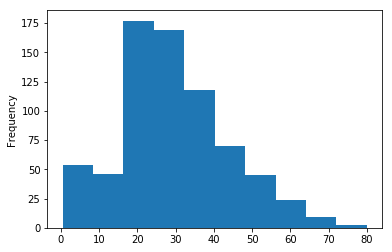

In [5]:
data['Age'].plot(kind='hist');

In [18]:
def filter_num(x):
    try:
        x = int(x)
        return True
    except:
        return False

In [19]:
data['Ticket'] = data['Ticket'].str.split(' ').str[0]

In [24]:
data.loc[data[data['Ticket'].apply(filter_num)].index,'Ticket'] = 'Number'

In [27]:
data['Ticket'] = data['Ticket'].str.replace('/','').str.replace('\.','')

In [28]:
data = data.drop(['Name','Cabin','PassengerId'],axis=1)
data['Age'] = data['Age'].fillna(data['Age'].mean())
data = data.dropna()

In [29]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A5,7.2500,S
1,1,1,female,38.0,1,0,PC,71.2833,C
2,1,3,female,26.0,0,0,STONO2,7.9250,S
3,1,1,female,35.0,1,0,Number,53.1000,S
4,0,3,male,35.0,0,0,Number,8.0500,S


### 数据预处理&建模

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [65]:
X = data.drop('Survived',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['Survived']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [66]:
model = DecisionTreeClassifier(random_state=7)

In [67]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [68]:
y_pred = model.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred)

0.8116591928251121

In [70]:
roc_auc_score(y_test,y_pred)

0.7958653026427963

### 优化

In [46]:
#去除tickslie
X = data.drop(['Survived','Ticket'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['Survived']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [47]:
model = DecisionTreeClassifier(random_state=7)

In [48]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [49]:
y_pred = model.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred)

0.7892376681614349

In [52]:
roc_auc_score(y_test,y_pred)

0.7754901960784315

In [76]:
#调参数
accuracy_scores = []
for max_depth in range(2,13,2):
    model = DecisionTreeClassifier(random_state=7,max_depth=max_depth)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))

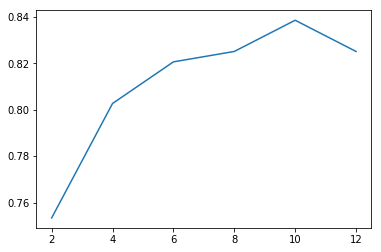

In [80]:
plt.plot(range(2,13,2),accuracy_scores);
#max_depth = 10

In [84]:
#调参数
accuracy_scores = []
for min_samples_split in range(2,13,2):
    model = DecisionTreeClassifier(random_state=7,max_depth=10,min_samples_split=min_samples_split)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))

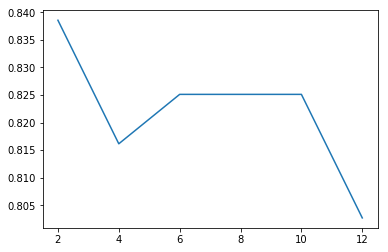

In [85]:
plt.plot(range(2,13,2),accuracy_scores);
#min_samples_split 取2

In [86]:
#调参数
accuracy_scores = []
for min_samples_leaf in range(1,12,2):
    model = DecisionTreeClassifier(random_state=7,max_depth=10,min_samples_split=2,min_samples_leaf=min_samples_leaf)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))

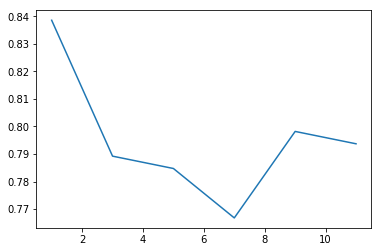

In [87]:
plt.plot(range(1,12,2),accuracy_scores);
#min_samples_leaf 取1

In [88]:
model = DecisionTreeClassifier(random_state=7,max_depth=10,min_samples_split=2,min_samples_leaf=1)

In [90]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8385650224215246